## Problem Context

### Businees Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application

* continent: Information of continent the employee

* education_of_employee: Information of education of the employee

* has_job_experience: Does the employee has any job experience? Y= Yes; N = No

* requires_job_training: Does the employee require any job training? Y = Yes; N = No

* no_of_employees: Number of employees in the employer's company

* yr_of_estab: Year in which the employer's company was established

* region_of_employment: Information of foreign worker's intended region of employment in the US.

* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position

* case_status: Flag indicating if the Visa was certified or denied
 change

### Importing necessary libraries

In [44]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading the dataset

In [47]:
# Read data and create a data frame
visa = pd.read_csv("EasyVisa.csv")  # original data frame

In [49]:
# Checking the number of rows and columns in the data
visa.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

## Data Overview

In [53]:
# let's create a copy of the data
df = visa.copy()

### Displaying the first few rows of the dataset

In [56]:
# let's view the first 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [58]:
# let's view the last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [61]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* 
Among the 11 columns of data (excluding case_id), 3 are of numeric type and the remaining 8 are of non-numeric typestatus

### Checking for duplicate values

In [65]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Checking for missing values

In [70]:
# let's check for missing values in the data
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values in the dataset.

In [72]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


* The mean and median values of no_of_employees are 5667 and 2109, respectively, implying a right-skewed distribution.
* The maximum value of no_of_employees is above 600000, which is quite high but possible.
* The minimum value of no_of_employees is -26, i.e., negative, which is unreasonable. The negative values should be treated as missing values.
* The oldest and newest employers have been established since (yr_of_estab) 1800 and 2016, respectively.
* The distribution of prevailing_wage is difficult to interpret at this point, because its unit varies across the rows. However, the minimum value is above zero, which is reasonable.ble.

In [114]:
# Check statistical summary of non-numeric data
df.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [116]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV01      0.000
EZYV16995   0.000
EZYV16993   0.000
EZYV16992   0.000
EZYV16991   0.000
             ... 
EZYV8492    0.000
EZYV8491    0.000
EZYV8490    0.000
EZYV8489    0.000
EZYV25480   0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
no_of_employees
183     0.001
854 

Observations
* The majority of employees are from Asia.
* The majority of employees have a Bachelor's degree.
* Most of the employees have job experience.
* The vast majority of the jobs do not require training.
* The regions Northeast, South, and West need most of the employees.
* The available units for wage are Year, Hour, Week, and Month. The majority of the wage values in the data are per year.
* The vast majority of the applications are for full-time positions.
* Near 2/3 of the visa applications are certified.

In [119]:
# Drop case_id column before EDA, as it has no meaning for analyses and modeling
df.drop("case_id", axis=1, inplace=True)

In [122]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

## Exploratory Data Analysis

### a) Univariate Analysis

In [130]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [134]:
# User-defined function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage to the left

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 0.5 * count + 1))
    else:
        plt.figure(figsize=(8, 0.5 * n + 1))

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_width() / total
            )
            # percentage of each class of the category
        else:
            label = p.get_width()  # count of each level of the category

        y = p.get_y() + p.get_height() / 2
        x = p.get_width()

        ax.annotate(
            label,
            (x, y),
            ha="left",
            va="center",
            size=12,
            xytext=(0, 0),
            textcoords="offset points",
        )  
        # annotate the percentage
    ax.set_xlabel(xlabel, fontsize=16)  # set x-axis label
    ax.set_ylabel(ylabel, fontsize=16)  # set y-axis label

    plt.show()  
# show the plot

### Continent of Origin

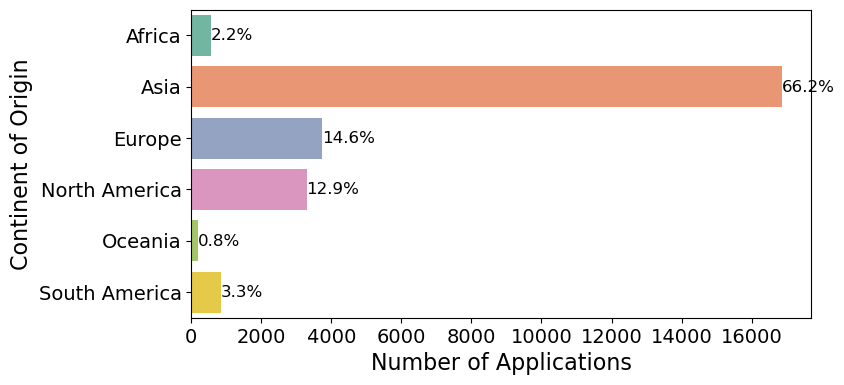

In [138]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="continent",
    xlabel="Number of Applications",
    ylabel="Continent of Origin",
    perc=True,
)

### Observations

* The majority (66%) of the visa applicants are from Asia, which makes sense given the high population of this continent.
* The lowest fraction (<1%) of the applicants are from Oceania, which also makes sense given its very low population.
* North America and Europe have close number of applicants (12.9% and 14.6%).

### Education Level

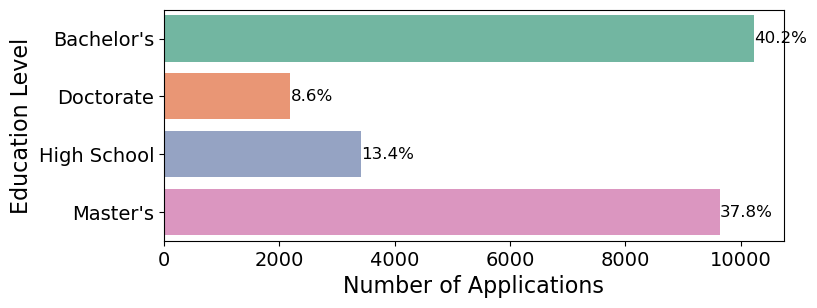

In [143]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="education_of_employee",
    xlabel="Number of Applications",
    ylabel="Education Level",
    perc=True,
)

### Observations

* The majority of the applicants have either bachelor's degrees (40.2%) or master's degrees (37.8%).* 
Only 8.6% of the applicants have doctorate degrees.

### Job Experiance

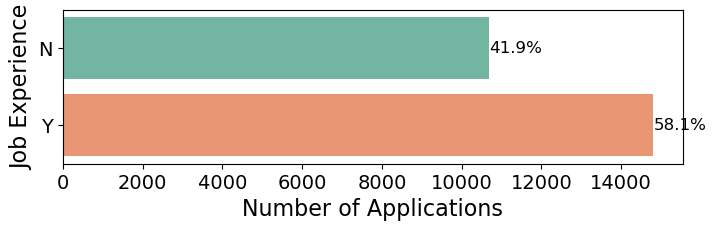

In [152]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="has_job_experience",
    xlabel="Number of Applications",
    ylabel="Job Experience",
    perc=True,
)

### Observations

* More than half (58%) of the applicants have job experience.

### Job Training Requirement

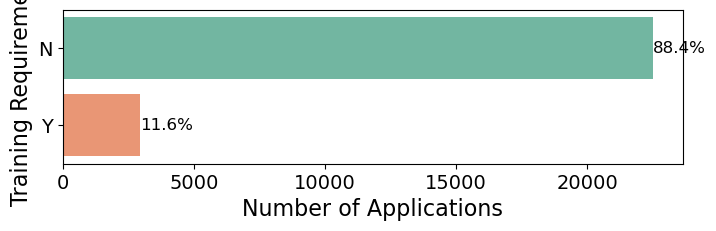

In [157]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="requires_job_training",
    xlabel="Number of Applications",
    ylabel="Training Requirement",
    perc=True,
)

### Observations

* The vast majority (>88%) of the jobs do not require the applicants to receive training.

### Employer Region

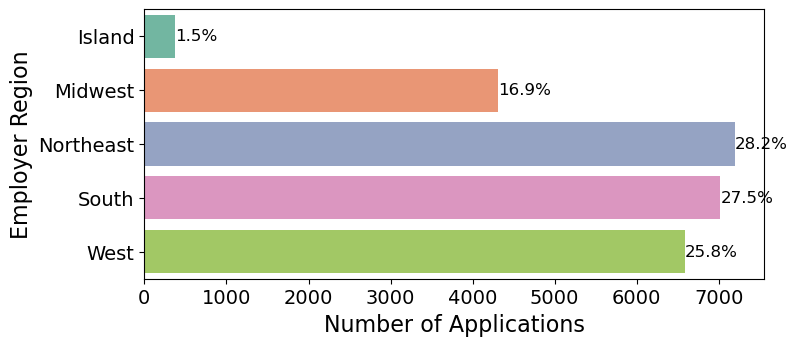

In [162]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="region_of_employment",
    xlabel="Number of Applications",
    ylabel="Employer Region",
    perc=True,
)

### Observations

* Most of the applications are for employment in the Northeast, South, and West regions of the United States. This could be expected because the majority of the tech companies are in those regions and the populations of those regions are higher than the other regions of the United States.* 
The Island region has the lowest number (1.5%) of work visa applicants.

### Position Type

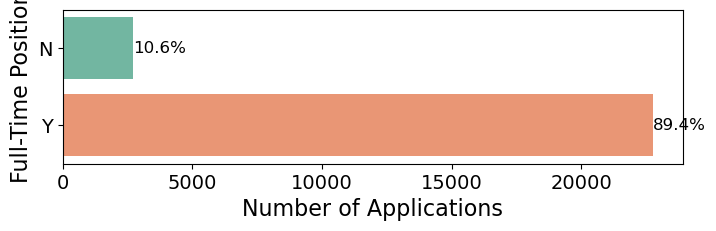

In [167]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="full_time_position",
    xlabel="Number of Applications",
    ylabel="Full-Time Position",
    perc=True,
)

### Observations

* More than 89% of the applications are related to full-time employment.

### Wage Unit

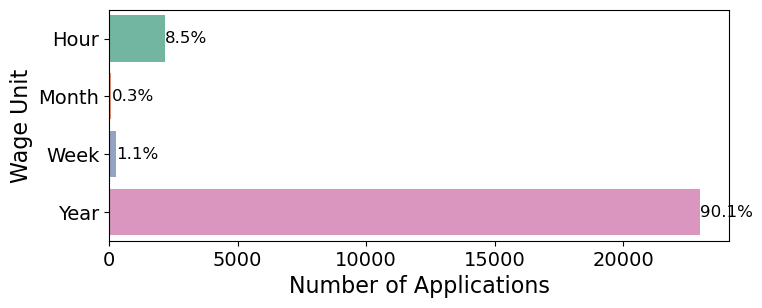

In [178]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="unit_of_wage",
    xlabel="Number of Applications",
    ylabel="Wage Unit",
    perc=True,
)

### Observations

* The dominant majority (90%) of the applications are for the jobs whose prevailing wages are computed per year.

### Case Status

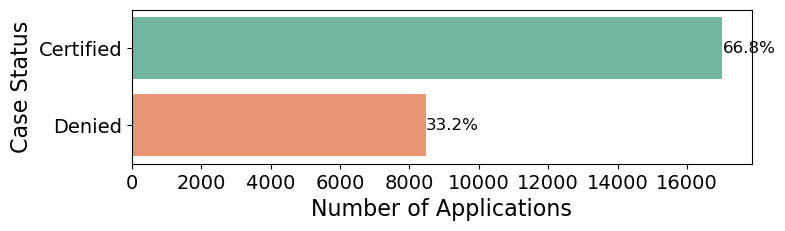

In [183]:
# Using user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=data,
    feature="case_status",
    xlabel="Number of Applications",
    ylabel="Case Status",
    perc=True,
)

### Observations

* Almost two-thirds of the visa applications are certified.

### No of Employees

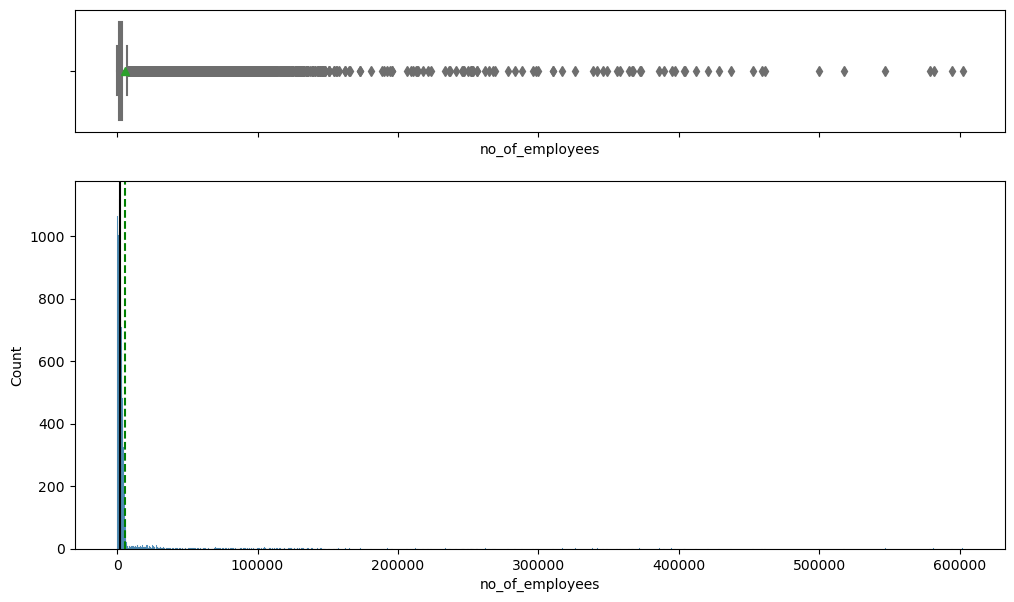

In [194]:
# Using user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(data, "no_of_employees")

### Observations

* There is a large variation in the number of employees of the employers.* 
The distribution is highly right-skewed
* Not all the detected outliers per 1.5-IQR rule shall be treated as outliers, because, in 2016, there existed employers in the United States that actually had hundreds of thousands of employees. Here, per the shown distribution, a cut-off value of 450000 is considered for the number of employees.s.

### b) Bivariate Analysis

Since the ultimate goal of this project is producing models to predict employment visa certification, the focus of the bivariate analyses will be on the effects of different independent variables on the target variable, i.e., `case_status`.

In [212]:
# User-defined function to plot a stacked barplot
def stacked_barplot(data, predictor, target, xlabel, ylabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    xlabel: label of x-axis
    ylabel: label of y-axis
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 2, 4))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

In [214]:
# User-defined function to plot distributions w.r.t. target
def distribution_plot_wrt_target(data, predictor, target, plabel, tlabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    plabel: label of predictor axes
    tlabel: label of target axes
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_title("Distribution of predictor for target = " + str(target_uniq[0]))
    axs[0, 0].set_xlabel(plabel, fontsize=16)
    axs[0, 0].set_ylabel("Density", fontsize=16)

    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of predictor for target = " + str(target_uniq[1]))
    axs[0, 1].set_xlabel(plabel, fontsize=16)
    axs[0, 1].set_ylabel("Density", fontsize=16)

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")
    axs[1, 0].set_xlabel(tlabel, fontsize=16)
    axs[1, 0].set_ylabel(plabel, fontsize=16)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    axs[1, 1].set_xlabel(tlabel, fontsize=16)
    axs[1, 1].set_ylabel(plabel, fontsize=16)

    plt.tight_layout()
    plt.show()

### Case Status vs. Continent of Origin

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


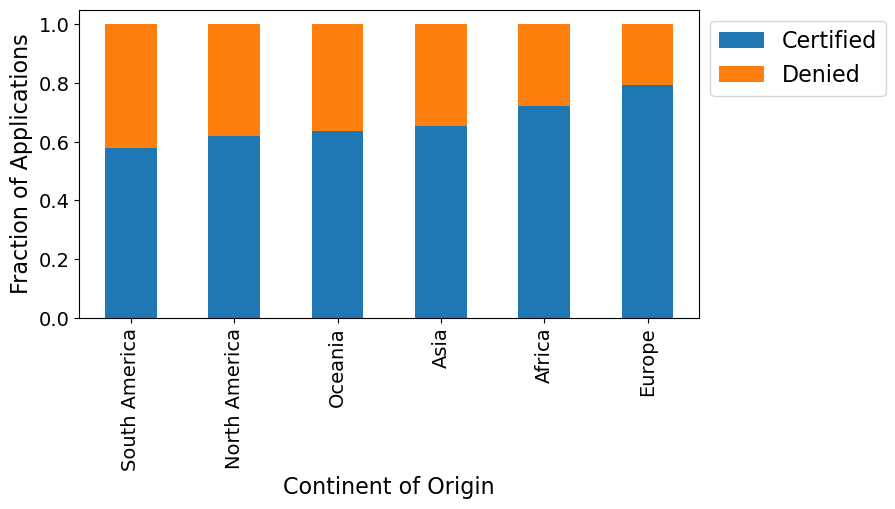

In [226]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs continent of origin
stacked_barplot(
    data=data,
    predictor="continent",
    target="case_status",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

### Observations

* Among different continents, Europe has the highest work visa certification rate (79%).* 
The lowest work visa certification rate belongs to South America (58%).

### Case Status vs. Education Level

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


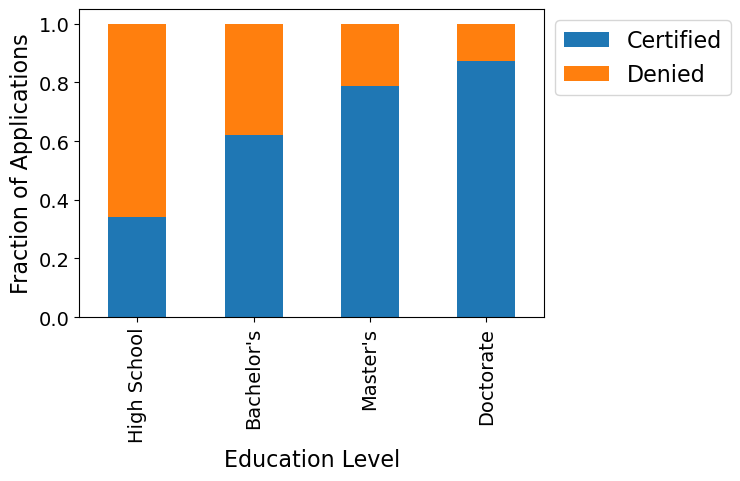

In [224]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs education level
stacked_barplot(
    data=data,
    predictor="education_of_employee",
    target="case_status",
    xlabel="Education Level",
    ylabel="Fraction of Applications",
)

### Observations

* It is clear that the higher the education level of an applicants is, the more their chances of visa certification are.
* More specifically, while the visa certification likelihood of the applicants of a doctorate degree is 87%, this likelihood is only 34% for the applicants of high school education.

### Case Status vs. Job Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


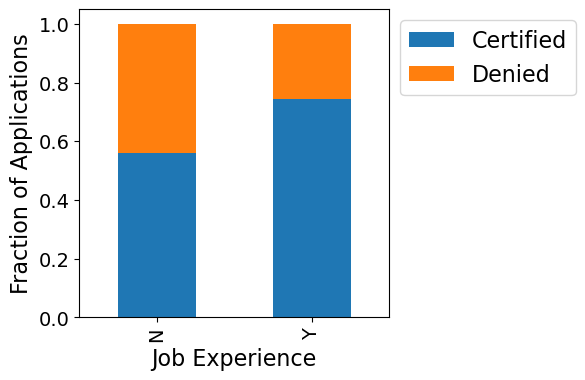

In [231]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs job experience
stacked_barplot(
    data=data,
    predictor="has_job_experience",
    target="case_status",
    xlabel="Job Experience",
    ylabel="Fraction of Applications",
)

### Observations

* Having job experience is found to have a positive effect on the visa certification likelihood.
* More specifically, about 74% of the experienced applicants are granted visas, while this percentages is only 56% for the inexperienced applicants.

### Case Status vs. Job Training Requirement

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


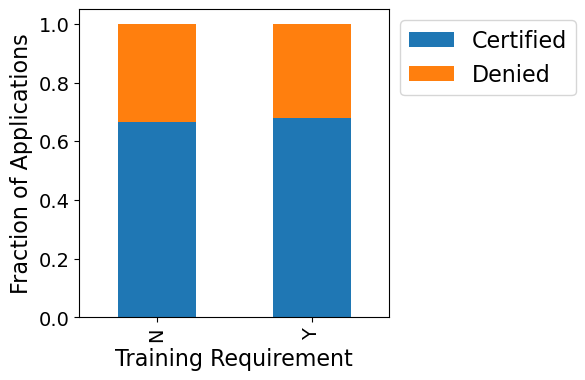

In [236]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs training requirement
stacked_barplot(
    data=data,
    predictor="requires_job_training",
    target="case_status",
    xlabel="Training Requirement",
    ylabel="Fraction of Applications",
)

### Observations

* The visa certification likelihood is found nearly unaffected by the job training requirement.

### Case Status vs. Employer Region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


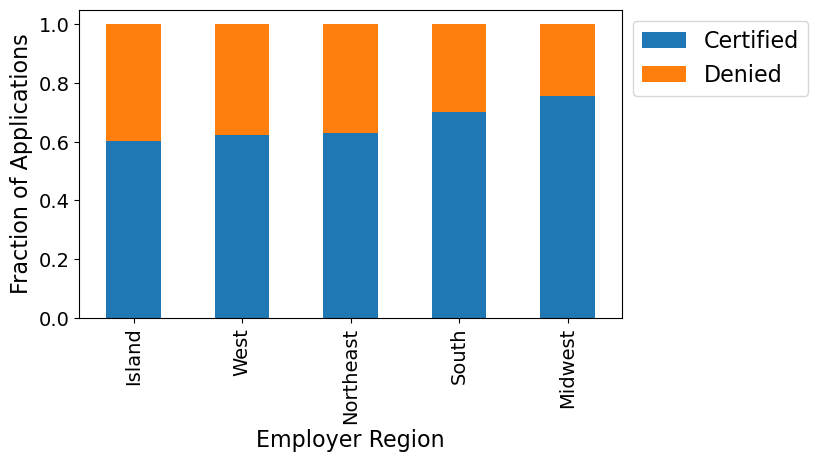

In [243]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs employer region
stacked_barplot(
    data=data,
    predictor="region_of_employment",
    target="case_status",
    xlabel="Employer Region",
    ylabel="Fraction of Applications",
)

### Observations

* It appears that the visa applications filed by the employers within the Midwest region have the highest probability (~76%) of certification.
* The employers located in the Northeast, West, and Island regions have lower chances (60-63%) of visa certification.

### Case Status vs. Position Type

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


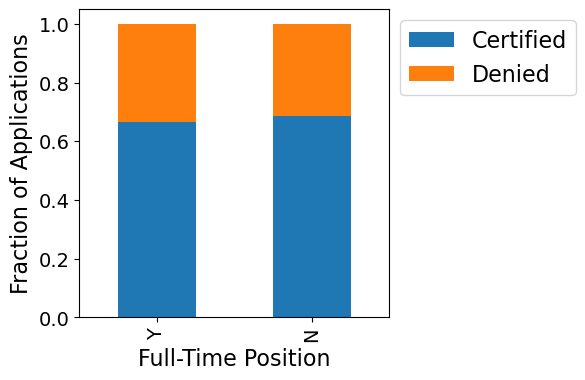

In [250]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs position type
stacked_barplot(
    data=data,
    predictor="full_time_position",
    target="case_status",
    xlabel="Full-Time Position",
    ylabel="Fraction of Applications",
)

### Observations

* Visa certification seems to be unaffected by whether a position is full-time or part-time.

### Case Status vs. Wage Unit

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


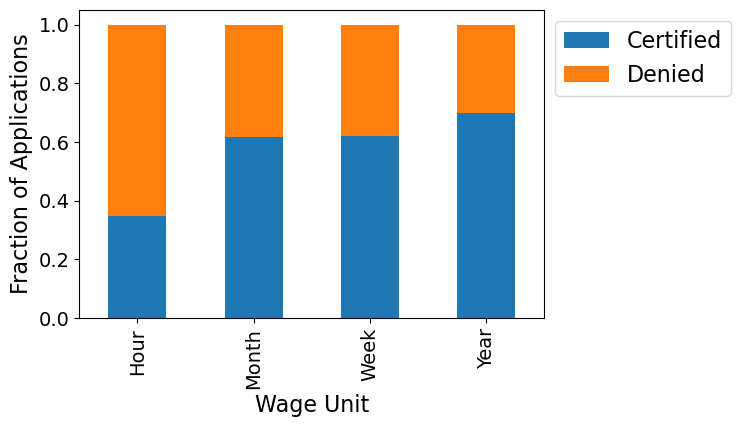

In [255]:
# Using user-defined function stacked_barplot() to examine case certification likelihoods vs unit of prevailing wage
stacked_barplot(
    data=data,
    predictor="unit_of_wage",
    target="case_status",
    xlabel="Wage Unit",
    ylabel="Fraction of Applications",
)

### Observations

* Those applicants whose wage unit is year are more likely than other applicants to be certified for a visa (~70% likelihood).
* The applicants who are paid by hour are the least likely to be certified for a visa (~35% likelihood). This could be predicted, because hourly jobs are usually less important for the growth of the United States and they could be done by normal American workers.

### Case Status vs. Number of Employees

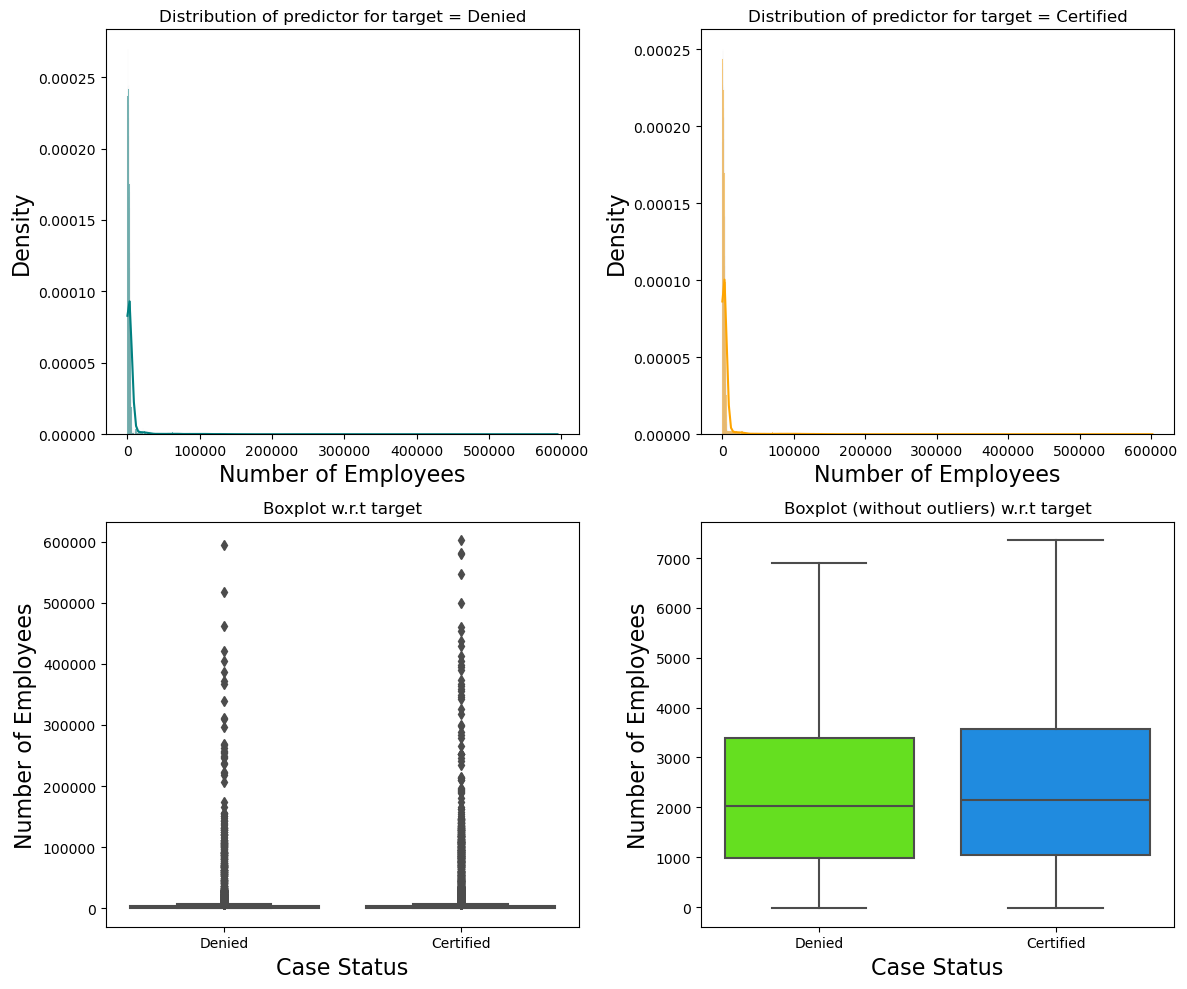

In [260]:
# Using user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=data,
    predictor="no_of_employees",
    target="case_status",
    plabel="Number of Employees",
    tlabel="Case Status",
)

### Observations

* A very small difference is observed between the distributions of the employer's number of employees for those applications that are denied and those that are certified. As a result, it seems that the number of employees has insignificant effect on the likelihood of visa certification.

### Training Requirement vs. Job Experience

Text(0.5, 14.722222222222216, 'Training Requirement')

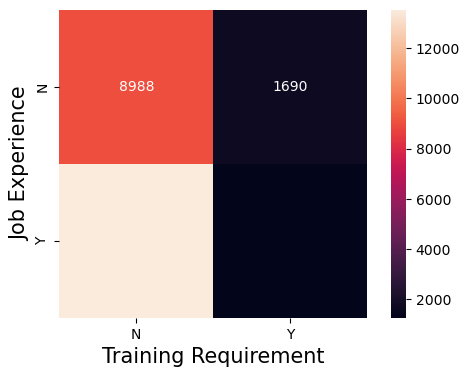

In [265]:
# Using seaborn heatmap to compare number of applications pivoted on job experience and training requirement

# Creating a count pivot table with respect to columns has_job_experience and requires_job_training
pt = data.pivot_table(
    values="case_status",
    index="has_job_experience",
    columns="requires_job_training",
    aggfunc="count",
)

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pt, square=True, annot=True, fmt="g")
plt.ylabel("Job Experience", fontsize=15)
plt.xlabel("Training Requirement", fontsize=15)

### Observations

* Reasonably, a higher percentage of the applicants who have no job experience require job training than the applicants who have job experience (16% vs. ~9%).

### Job Training Requirement vs. Continent

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


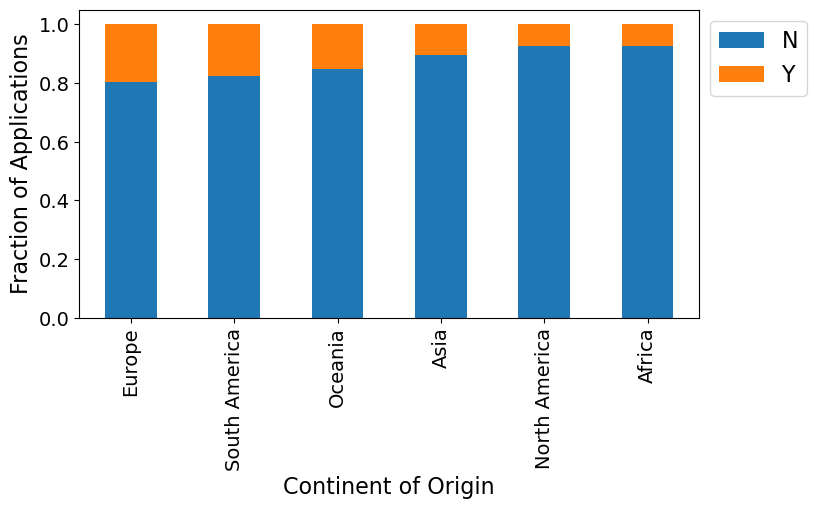

In [270]:
# Using user-defined function stacked_barplot() to examine job training requirement vs continent of origin of applicants
stacked_barplot(
    data=data,
    predictor="continent",
    target="requires_job_training",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

### Observations

* Among the applicants from different continents, a smaller ratio of those from Africa and North America need training than those from other continents.
* The highest ratio of the applicants who need training belongs to those from Europe.

## Data Preprocessing

In [275]:
# Create a copy of data frame before preprocessing
data1 = data.copy()

### a) Treatment of Missing Values

* Based on the initial evaluations, no values were missing in any of the columns. However, there were rows with unrealistic non-positive (<0) values of no_of_employees. To address this problem, these values are replaced with the median of no_of_employees.

In [279]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = data1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
data1.loc[neg_employee_no_rows, "no_of_employees"] = data1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {data1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


### b) Feature Engineering

The feature yr_of_estab is converted to yrs_snc_estab, containing the years since establishment. Also, to make the prevailing wages (in the column prevailing_wage) interpretable across the rows, they are all transformed into an equivalent hourly wage and are saved in a new column, hourly_wage. The columns yr_of_estab and prevailing_wage are dropped subsequently.

In [285]:
# Add a new column, yrs_snc_estab, including years since establishment - final year is 2016, when data is gathered
data1["yrs_snc_estab"] = 2016 - data1.yr_of_estab

# Drom yr_of_estab
data1.drop("yr_of_estab", axis=1, inplace=True)

# Create a column including equivalent hourly wages - it is assumed that:
# A year includes 2080 work-hours
# A month includes 173 work-hours
# A week includes 40 work-hours
data1["hourly_wage"] = data1["prevailing_wage"]
data1.loc[data1.unit_of_wage == "Year", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
data1.loc[data1.unit_of_wage == "Month", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
data1.loc[data1.unit_of_wage == "Week", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# Drom yr_of_estab
data1.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
data1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,Certified,24,12.905
23951,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,Certified,78,31.933
8625,Asia,Master's,N,N,2635,South,Hour,Y,Certified,11,887.292
20206,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,Certified,30,23.767
7471,Europe,Bachelor's,Y,N,4681,West,Year,Y,Denied,88,23.974
3433,Asia,Bachelor's,Y,N,222,South,Hour,Y,Certified,27,813.726
24440,Europe,High School,N,Y,3278,South,Year,Y,Denied,22,98.533
12104,Asia,Master's,Y,N,1359,West,Year,N,Certified,19,97.229
15656,Asia,Bachelor's,N,N,2081,West,Year,Y,Denied,13,53.708
23110,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,Denied,18,444.826


In [287]:
# Check statistical summary of numeric data in updated data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5669.798,22877.372,12.000,1028.000,2109.000,3504.000,602069.000
yrs_snc_estab,25480.000,36.590,42.367,0.000,11.000,19.000,40.000,216.000
hourly_wage,25480.000,94.903,278.177,0.048,22.648,39.827,60.012,7004.399


### Observations

* The mean and median values of yrs_snc_estab are ~37 and 19 years, respectively. The oldest employer was established 216 years before the data collection.
* The minimum and maximum values of hourly_wage are 0.05 and ~7004 (probably in dollars), respectively, so the variation of this variable is very large. The mean hourly wage is ~95.

### a)Detection and Treatment of Outliers

Detection of Outliers

Initially, the 1.5-IQR rule is used to detect potential outliers. However, it is noted that all the values detected as outlier by this method are not always outliers.

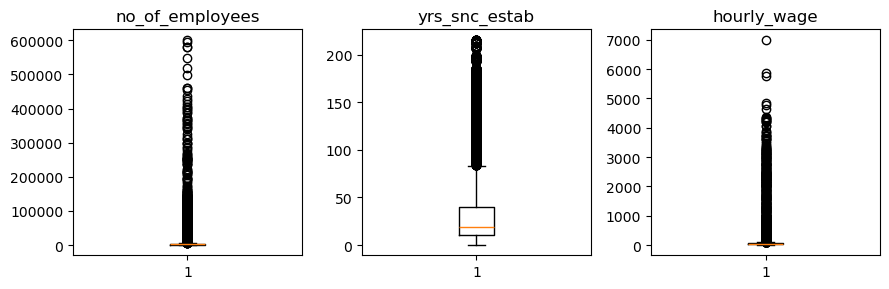

In [298]:
# Create a list of column names including numeric data
num_cols = data1.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations

Given the discussions provided in the initial EDA section, not all the outliers detected based on the 1.5-IQR rule are actual outliers. Here, merely to remove very large infrequent values, the following maximum cut-off values are considered for the above three variables:
* no_of_employees: 450000
* yrs_snc_estab: 200
* hourly_wage: 4000

### Treatment of Outliers

The detected upper outliers are replaced with the maximum values of the respective columns in the absence of the outliers.

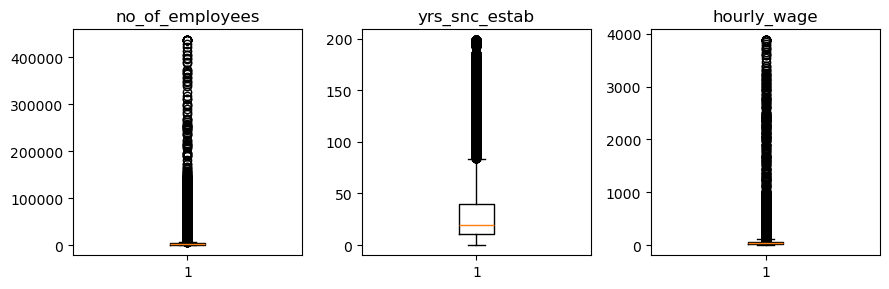

In [315]:
# Replace outliers in no_of_employees
data1.loc[data1.no_of_employees > 450000, "no_of_employees"] = data1[
    data1.no_of_employees <= 450000
].no_of_employees.max()

# Replace outliers in yrs_snc_estab
data1.loc[data1.yrs_snc_estab > 200, "yrs_snc_estab"] = data1[
    data1.yrs_snc_estab <= 200
].yrs_snc_estab.max()

# Replace outliers in hourly_wage
data1.loc[data1.hourly_wage > 4000, "hourly_wage"] = data1[
    data1.hourly_wage <= 4000
].hourly_wage.max()

# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Secondary EDA

The focus of the secondary EDA is on the new variables created in the section Data Preprocessing.

### Univariate Analysis

### Years Since Establishment

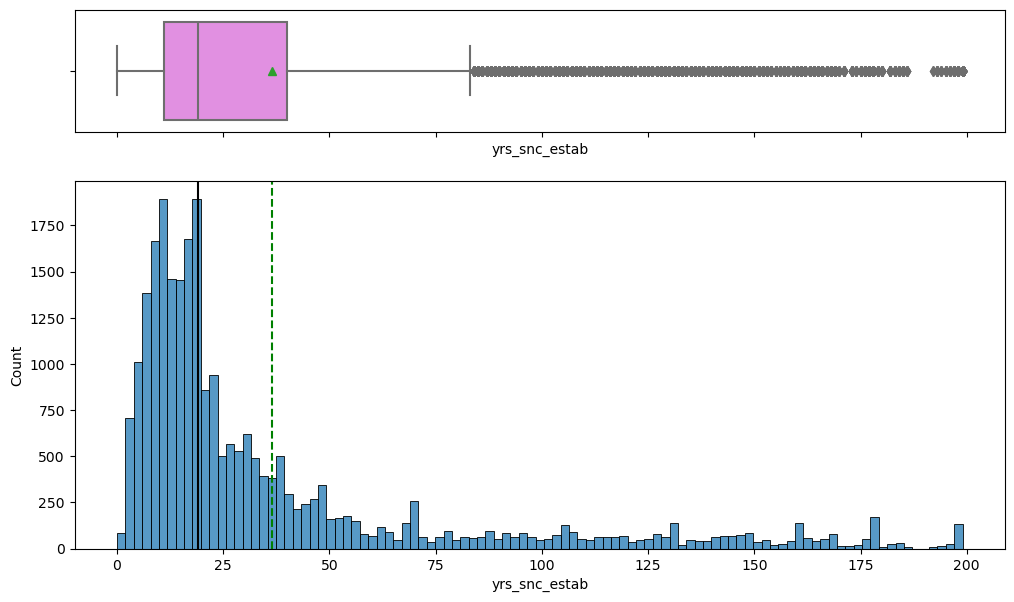

In [330]:
# Using user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(data1, "yrs_snc_estab")

### Observations

The distribution is quite right-skewed and the majority of the employers are less than 40 years old.
As mentioned in the previous section on the treatment of outliers, the detected outliers per 1.5-IQR rule are not actually outliers.

### Hourly Wage

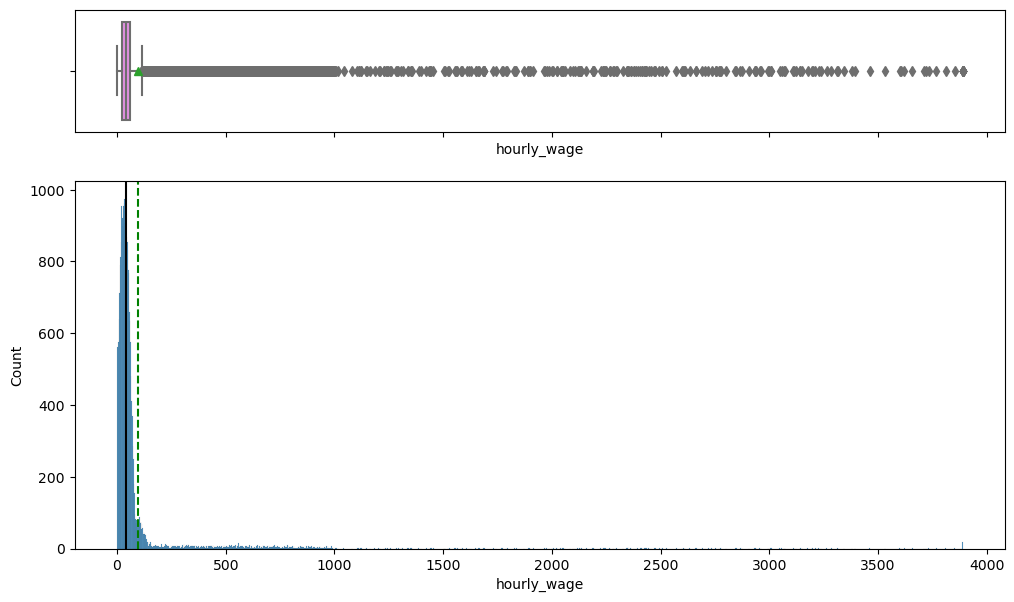

In [337]:
# Using user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(data1, "hourly_wage")

### Observations

* The distribution of the computed equivalent hourly wage is highly right-skewed and the majority of the applications are for the positions with less than 100 (dollars) of equivalent hourly wage.
* Since there are certain positions in certain industries that are paid millions of dollars per year, the detected outliers are not actual outliers.

## Bivariate Analysis

### Linear Correlation Coefficients

The linear correlation coefficients are only determined between the numeric variables, i.e., no_of_employees, yrs_snc_estab, and hourly_wage.

Text(0.5, 1.0, 'Correlation Coefficients')

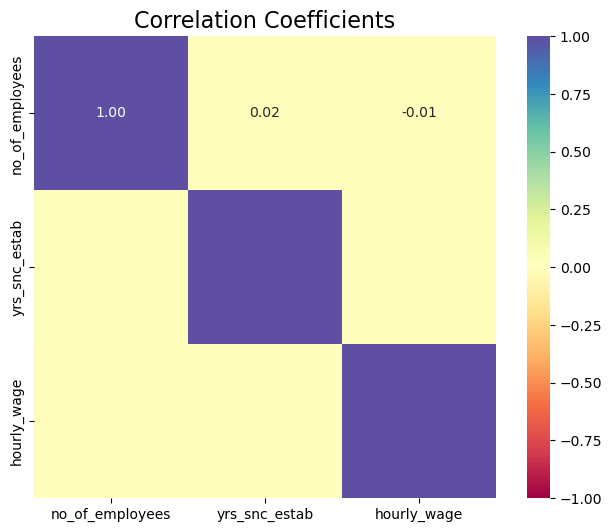

In [344]:
# Create a list of column names including numeric data
num_cols = data1.select_dtypes(include=np.number).columns.tolist()

# Compute correlation coefficients
rhos = data1[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # set figure size

p = sns.heatmap(
    rhos,
    annot=True,
    square=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  # create heatmap

p.set_title("Correlation Coefficients", fontsize=16)
# set chart's title

### Observations

* Negligible linear correlation is observed between the numeric variables.

### Pairplot

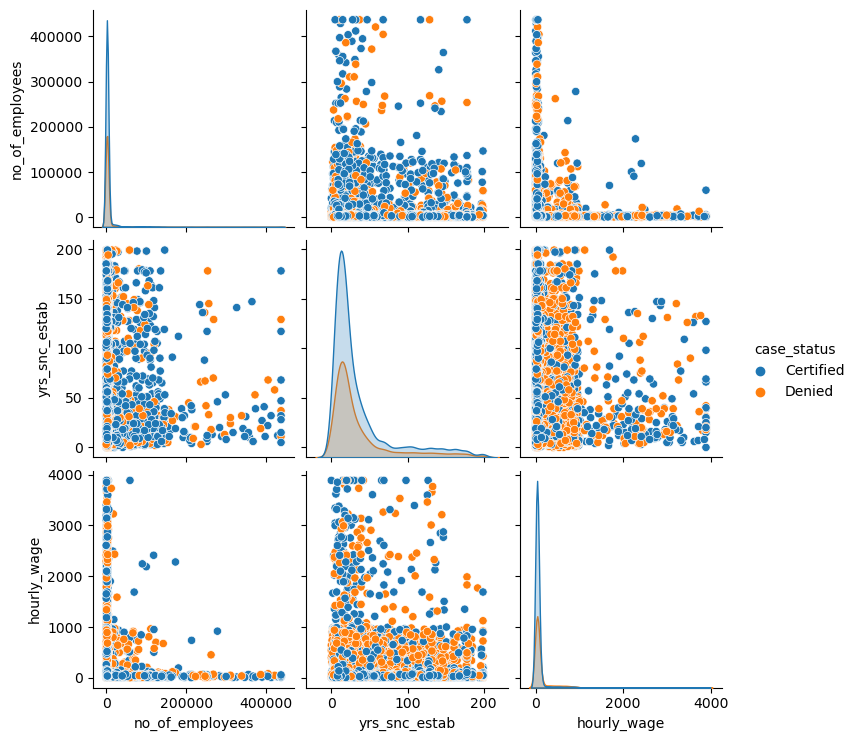

In [385]:
# Add case_status to list of column names including numeric data
num_cols = [col for col in num_cols if pd.api.types.is_numeric_dtype(data1[col])]

# Create the pairplot
sns.pairplot(data=data1[num_cols + ['case_status']], hue='case_status', diag_kind='kde', aspect=1)
plt.show()

### Observations

* No linear correlation is observed between the numeric variables.
* It is hard to identify the effects of the above variables on the visa certification likelihood.

### Case Status vs. Hourly Wage

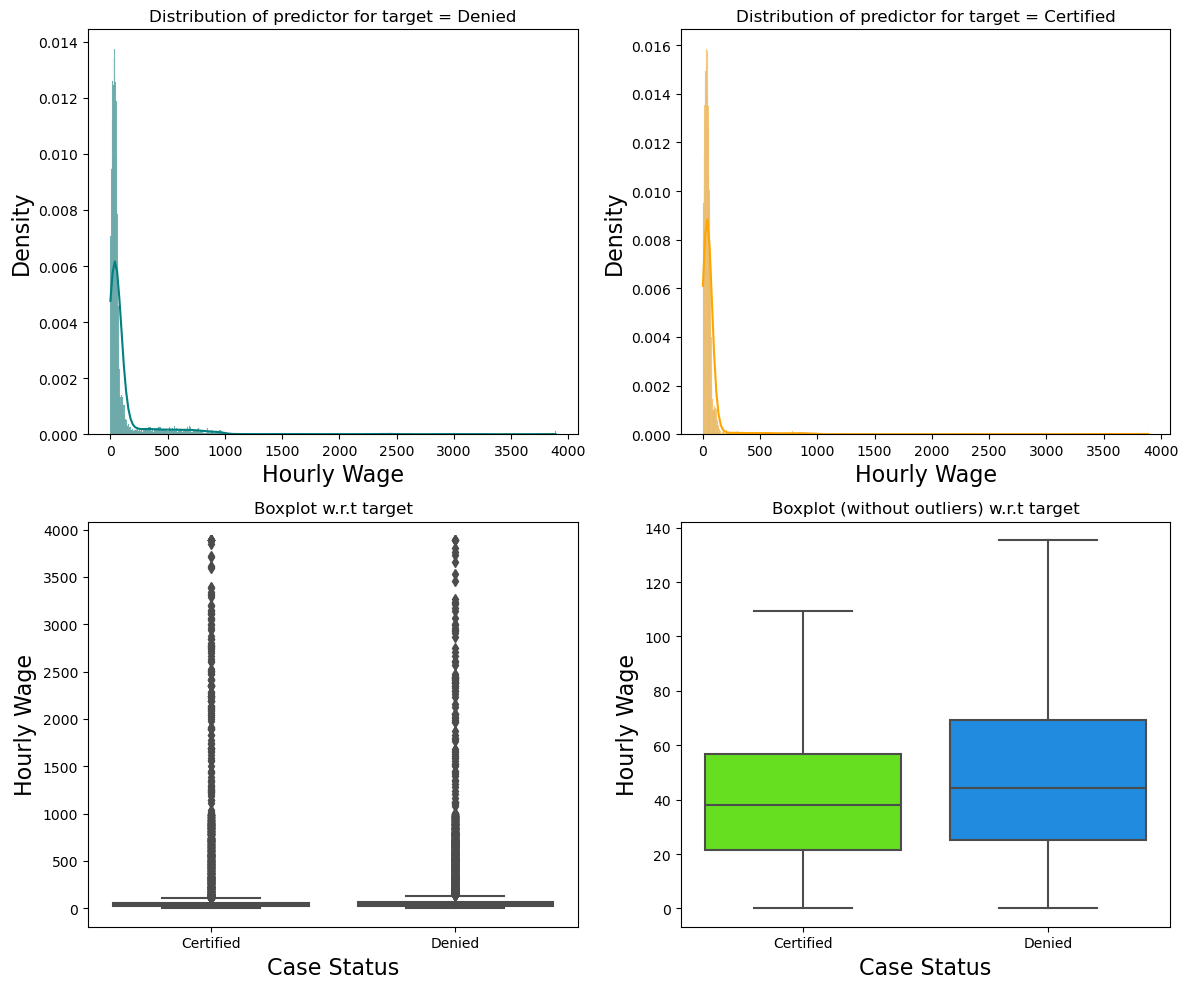

In [392]:
# Using user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=data1,
    predictor="hourly_wage",
    target="case_status",
    plabel="Hourly Wage",
    tlabel="Case Status",
)

### Observations

* It appears that a decrease in the equivalent hourly wage would lead to an increase in the likelihood of visa certification. This could be justified by the fact that the jobs that are paid higher could be more easily filled by American workers, making the emplyment of aliens unjustifiable.

### Hourly Wage vs. Education Level

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High School'),
  Text(0, 1, "Master's"),
  Text(0, 2, "Bachelor's"),
  Text(0, 3, 'Doctorate')])

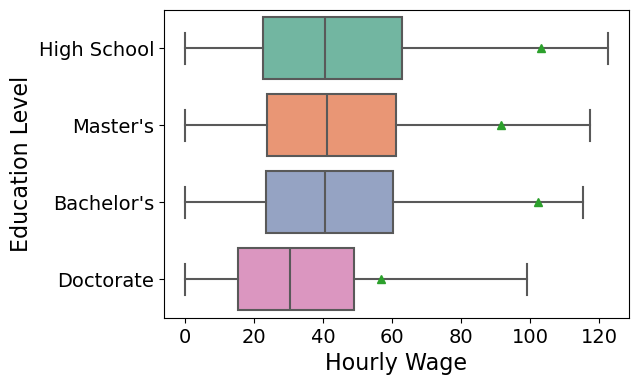

In [399]:
# Using seaborn boxplot to compare distributions of hourly wage for different education levels without outliers
plt.figure(figsize=(6, 4))
# set figure size
sns.boxplot(
    data=data1,
    y="education_of_employee",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Education Level", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Observations

On average, the employees of less education (e.g., high school and bachelor's degree) seem to be paid more in terms of equivalent hourly wage than the employees of higher education, particularly, those of a doctorate degree.

### Hourly Wage vs. Job Experience

(array([0, 1]), [Text(0, 0, 'N'), Text(0, 1, 'Y')])

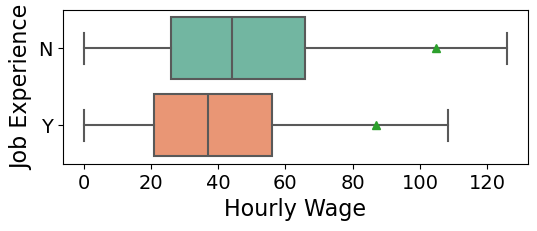

In [406]:
# Using seaborn boxplot to compare distributions of hourly wage with respect to job experience
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=data1,
    y="has_job_experience",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Job Experience", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Observations

On average, those employees that have job experience seem to receive lower equivalent hourly wage than those who have no job experience.

### Hourly Wage vs. Job Training

(array([0, 1]), [Text(0, 0, 'N'), Text(0, 1, 'Y')])

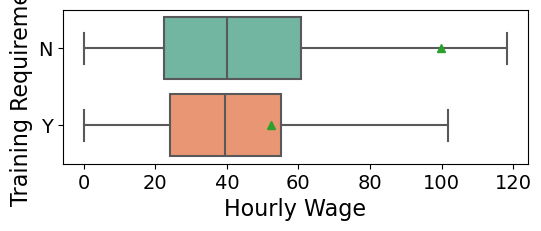

In [411]:
# Using seaborn boxplot to compare distributions of hourly wage with respect to job training requirement
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=data1,
    y="requires_job_training",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Training Requirement", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Observations

On average, the equivalent hourly wage of the applicants who do not require training is higher than those who require training.

### Case Status vs. Years Since Establishment

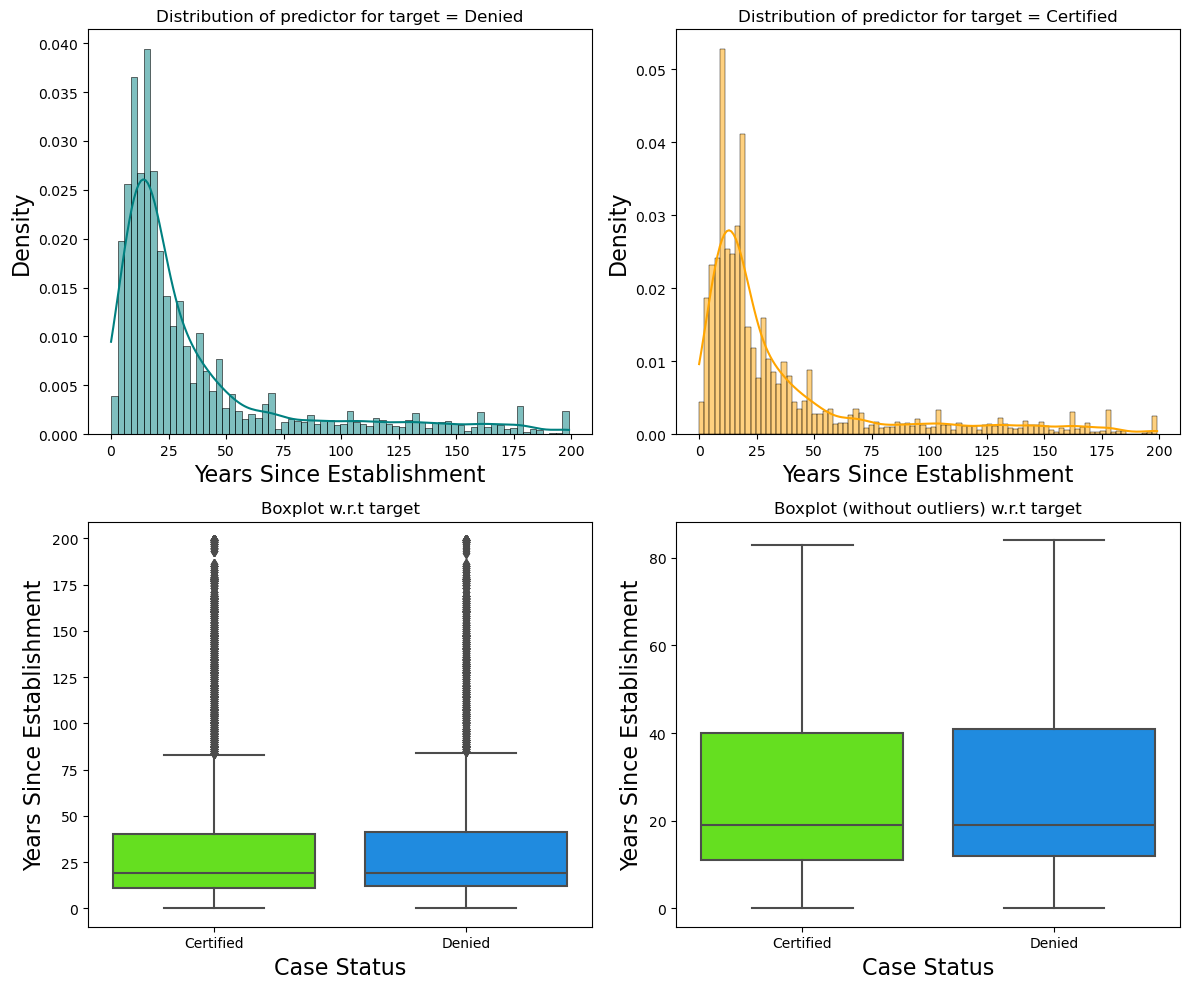

In [418]:
# Using user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=data1,
    predictor="yrs_snc_estab",
    target="case_status",
    plabel="Years Since Establishment",
    tlabel="Case Status",
)

### Observations

A very small difference is observed between the distributions of the employer's age for those applications that are denied and those that are certified. As a result, it seems that the number of years since establishment has insignificant effect on the likelihood of visa certification.

### Number of Employees vs. Years Since Establishment

Text(37.597222222222214, 0.5, 'Number of Employees')

<Figure size 400x400 with 0 Axes>

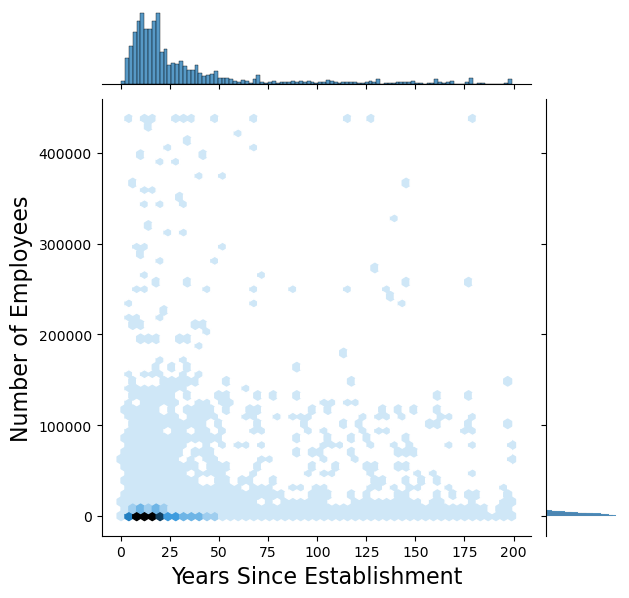

In [423]:
# Using seaborn jointplot to compare distributions of number of employees vs years since employer's establishment
plt.figure(figsize=(4, 4))
# set figure size
sns.jointplot(data=data1, x="yrs_snc_estab", y="no_of_employees", kind="hex", bins=10)
# create joint plot

plt.xlabel("Years Since Establishment", fontsize=16)
# set x-axis label
plt.ylabel("Number of Employees", fontsize=16)
# set y-axis label

### Observations

Older employers seem to tend to have slightly smaller number of employees compared to the younger employers.

## Data Preparation for Modeling

## a) Encoding Categorical Data

Encoding the values in the columns has_job_experience, requires_job_training, full_time_position, case_status and education_of_employee.

In [430]:
# has_job_experience, requires_job_training, and full_time_position:
# Replace 'Y' with 1 and 'N' with 0
data1.has_job_experience = data1.has_job_experience.apply(lambda x: 1 if x == "Y" else 0)
data1.requires_job_training = data1.requires_job_training.apply(
    lambda x: 1 if x == "Y" else 0
)
data1.full_time_position = data1.full_time_position.apply(lambda x: 1 if x == "Y" else 0)

# case_status:
# Replace 'Certified' with 1 and 'Denied' with 0
data1.case_status = data1.case_status.apply(lambda x: 1 if x == "Certified" else 0)

# education_of_employee:
# Replace 'High School' with 1, 'Bachelor's' with 2, 'Master's' with 3, and 'Doctarate' with 4
data1.education_of_employee = data1.education_of_employee.apply(
    lambda x: 1
    if x == "High School"
    else (2 if x == "Bachelor's" else (3 if x == "Master's" else 4))
)

# Check updated sample rows
data1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,2,1,0,567,Midwest,Year,1,1,24,12.905
23951,Oceania,2,0,0,619,Midwest,Year,1,1,78,31.933
8625,Asia,3,0,0,2635,South,Hour,1,1,11,887.292
20206,Asia,2,1,1,3184,Northeast,Year,1,1,30,23.767
7471,Europe,2,1,0,4681,West,Year,1,0,88,23.974
3433,Asia,2,1,0,222,South,Hour,1,1,27,813.726
24440,Europe,1,0,1,3278,South,Year,1,0,22,98.533
12104,Asia,3,1,0,1359,West,Year,0,1,19,97.229
15656,Asia,2,0,0,2081,West,Year,1,0,13,53.708
23110,North America,2,1,0,854,Northeast,Hour,1,0,18,444.826


### Separation of Dependent and Independent Variables

In [602]:
# Create a data frame with only independent variables
X = data1.drop(["case_status"], axis=1)

# Create a series with only dependent variable
y = data1.case_status

# Print some rows of X and Y data frames to check them
print("Independent Variables\n", "=" * 80, "\n", X.sample(5, random_state=1))
print("\n\nDependent Variables\n", "=" * 80, "\n", Y.sample(5, random_state=1))

Independent Variables
       continent  education_of_employee  has_job_experience  \
17639      Asia                      2                   1   
23951   Oceania                      2                   0   
8625       Asia                      3                   0   
20206      Asia                      2                   1   
7471     Europe                      2                   1   

       requires_job_training  no_of_employees region_of_employment  \
17639                      0              567              Midwest   
23951                      0              619              Midwest   
8625                       0             2635                South   
20206                      1             3184            Northeast   
7471                       0             4681                 West   

      unit_of_wage  full_time_position  yrs_snc_estab  hourly_wage  
17639         Year                   1             24       12.905  
23951         Year                   1       

## b) Creating Dummy Variables

Create dummy variables for the categorical columns, i.e., unit_of_wage, continent, and region_of_employment.

In [604]:
# Use pandas function get_dummies to create dummy variables and drop their first one
X = pd.get_dummies(X, drop_first=True)

# Check updated independent variables data frame
X.sample(5, random_state=1)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,yrs_snc_estab,hourly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
17639,2,1,0,567,1,24,12.905,True,False,False,False,False,True,False,False,False,False,False,True
23951,2,0,0,619,1,78,31.933,False,False,False,True,False,True,False,False,False,False,False,True
8625,3,0,0,2635,1,11,887.292,True,False,False,False,False,False,False,True,False,False,False,False
20206,2,1,1,3184,1,30,23.767,True,False,False,False,False,False,True,False,False,False,False,True
7471,2,1,0,4681,1,88,23.974,False,True,False,False,False,False,False,False,True,False,False,True


## c) Splitting Data into Training and Test Set

In [608]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 19) (5096, 19) (5096, 19)


## Model Building

In [610]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [612]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data

In [614]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9866797257590597
Random forest: 1.0
GBM: 0.8781586679725759
Adaboost: 0.8905974534769834
dtree: 1.0

Validation Performance:

Bagging: 0.7884841363102233
Random forest: 0.8393066980023501
GBM: 0.8783783783783784
Adaboost: 0.8821974148061105
dtree: 0.7441245593419507


In [616]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9867, Validation Score: 0.7885, Difference: 0.1982
Random forest: Training Score: 1.0000, Validation Score: 0.8393, Difference: 0.1607
GBM: Training Score: 0.8782, Validation Score: 0.8784, Difference: -0.0002
Adaboost: Training Score: 0.8906, Validation Score: 0.8822, Difference: 0.0084
dtree: Training Score: 1.0000, Validation Score: 0.7441, Difference: 0.2559


* AdaBoost has the best performance followed by GBM model as per the validation performance

### Model Building - Oversampled Data

In [619]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 19)
After Oversampling, the shape of train_y: (20420,) 



In [621]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9815866797257591
Random forest: 1.0
GBM: 0.8431929480901077
Adaboost: 0.8283055827619981
dtree: 1.0

Validation Performance:

Bagging: 0.7502937720329025
Random forest: 0.8119858989424207
GBM: 0.8304935370152762
Adaboost: 0.81786133960047
dtree: 0.7394242068155111


In [623]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9816, Validation Score: 0.7503, Difference: 0.2313
Random forest: Training Score: 1.0000, Validation Score: 0.8120, Difference: 0.1880
GBM: Training Score: 0.8432, Validation Score: 0.8305, Difference: 0.0127
Adaboost: Training Score: 0.8283, Validation Score: 0.8179, Difference: 0.0104
dtree: Training Score: 1.0000, Validation Score: 0.7394, Difference: 0.2606


* GBM has the best performance on validation followed by Adaboost

### Model Building - Undersampled Data

In [629]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [631]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 19)
After Under Sampling, the shape of train_y: (10156,) 



In [633]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9706577392674282
Random forest: 0.9998030720756204
GBM: 0.7534462386766444
Adaboost: 0.7046081134304845
dtree: 1.0

Validation Performance:

Bagging: 0.6075205640423031
Random forest: 0.6700940070505288
GBM: 0.732373678025852
Adaboost: 0.7006462984723855
dtree: 0.6204465334900118


In [635]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9707, Validation Score: 0.6075, Difference: 0.3631
Random forest: Training Score: 0.9998, Validation Score: 0.6701, Difference: 0.3297
GBM: Training Score: 0.7534, Validation Score: 0.7324, Difference: 0.0211
Adaboost: Training Score: 0.7046, Validation Score: 0.7006, Difference: 0.0040
dtree: Training Score: 1.0000, Validation Score: 0.6204, Difference: 0.3796


* GBM has the best performance followed by AdaBoost model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [641]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7908595477289477:
CPU times: total: 2.94 s
Wall time: 37.6 s


In [643]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [645]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.703,0.718,0.697,0.707


In [647]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.709,0.713,0.828,0.766


### Tuning  Gradient Boosting model with Undersampled Data

In [650]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7469487219270005:
CPU times: total: 7.28 s
Wall time: 2min 42s


In [652]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [654]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.705,0.723,0.697,0.710


In [656]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.711,0.718,0.827,0.768


### Tuning Gradient Boosting model with Oversampled data

In [659]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8345739471106759:
CPU times: total: 9.97 s
Wall time: 3min 59s


In [661]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [663]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.742,0.723,0.751,0.737


In [667]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.711,0.718,0.827,0.768


## Model Comparison and Final Model Selection

In [670]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.705,0.742,0.703
Recall,0.723,0.723,0.718
Precision,0.697,0.751,0.697
F1,0.710,0.737,0.707


In [672]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.711,0.711,0.709
Recall,0.718,0.718,0.713
Precision,0.827,0.827,0.828
F1,0.768,0.768,0.766


- AdaBoost model trained with undersampled data has generalised performance, so let's consider it as the best model.

In [675]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.706,0.726,0.813,0.767


- The Adaboost model trained on undersampled data has given ~73% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

### Feature Importance

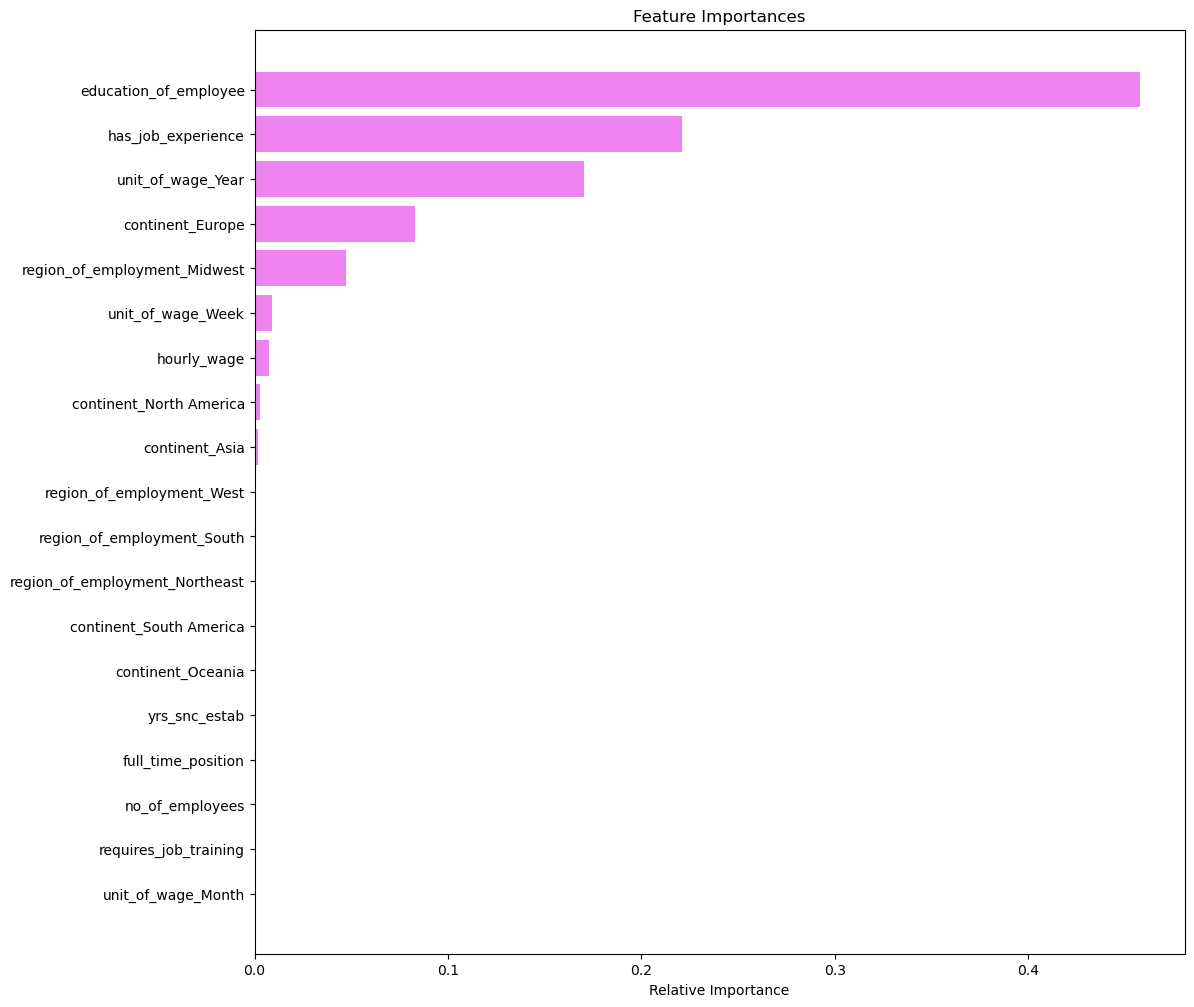

In [679]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that education_of_employee, has_job_experience, unit_of_wage_Year are the most important features for making predictions

# Business Insights and Recommendations

- `According to the EDA:`

- The majority (66%) of work via applications are from Asia.
- A large portion (78%) of the applicants have a bachelor's or a master's degree and only less than 9% have a doctrate degree.
- Most (58%) of the applicants have job experience.
- The vast majority of offerred jobs (88%) do not require training.
- The majority (>81%) of the offered jobs are for Northeast, South, and West regions of the US.
- The majority (89%) of the offered positions are full-time.
- Merely about 10% of the positions have a wage unit other than Year.
- About 2/3 of the work visa applications are certified.
- The European and South American applicants have the highest and the lowest chances of visa certification, respectively.
- The higher the applicant's education level is, the more their chances of visa certification are.
- Having job experience increases the chances of visa certification.
- Job training requirement has a negligible effect on visa certification likelihood.
- The visa applications for the employment in the Midwest region are more likely to be certified than the applications for the employment in other regions.
- Being a full- or part-time position does not observably affect the visa certification likelihood.
- The offered positions with the wage units of Year and Hour have the highest and the lowest chances of visa certification, respectively.
- The employer's number of employees has an insignificant impact on the chances of visa certification for its potential foreign employees.
- The majority of employers applying for work visas are less than 40 years old.
- The majority of the applications are for the jobs with an equivalent hourly wage of less than 100 (probably in dollars).
- The positions with certified visa applications are on average of lower equivalent hourly wages than the positions with denied visa applications.- 
The age of an employer has negligible effect on the likelihood of visa certification.